In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gps=pd.read_csv("playstore-analysis (2) (1).csv")
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
gps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
gps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# TASKS:

## 1. Data clean up – Missing value treatment

### a. Drop records where rating is missing since rating is our target/study variable

In [6]:
gps.dropna(subset=['Rating'],inplace=True)

### b. Check the null values for the Android Ver column. 

In [7]:
gps['Android Ver'].isnull().sum()

3

In [8]:
gps[gps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### i. Are all 3 records having the same problem?

Yes , all the 3 records are NaN.

##### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [9]:
gps.drop([10472],inplace=True)

In [10]:
gps[gps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


##### iii. Replace remaining missing values with the mode

In [11]:
gps['Android Ver'].fillna(gps['Android Ver'].mode()[0],inplace=True)

In [12]:
gps['Android Ver'].isnull().sum()

0

### c. Current ver – replace with most common value

In [13]:
gps['Current Ver'].fillna(gps['Current Ver'].mode()[0],inplace=True)

In [14]:
gps['Current Ver'].isnull().sum()

0

## 2. Data clean up – correcting the data types

### a. Which all variables need to be brought to numeric types?

In [15]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [16]:
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Reviews , Installs & Price are needed to be converted to numeric type

### b. Price variable – remove $ sign and convert to float

In [17]:
gps['Price']=gps['Price'].astype('str')

In [18]:
gps['Price']=gps['Price'].str.replace('$','')

C:\Users\91905\AppData\Local\Temp\ipykernel_9452\3803859520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Price']=gps['Price'].str.replace('$','')


In [19]:
gps['Price']=gps['Price'].astype(float)

In [20]:
gps['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [21]:
gps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [22]:
gps['Installs']=gps['Installs'].str.replace(',','')
gps['Installs']=gps['Installs'].str.replace('+','')

C:\Users\91905\AppData\Local\Temp\ipykernel_9452\2760125189.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gps['Installs']=gps['Installs'].str.replace('+','')


In [23]:
gps['Installs']=gps['Installs'].astype('int')

### d. Convert all other identified columns to numeric

In [24]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [25]:
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
# converting the type of Reviews to integer
gps['Reviews']=gps['Reviews'].astype(int)

In [27]:
gps['Type']=gps['Type'].str.replace('Free','0')
gps['Type']=gps['Type'].str.replace('Paid','1') 
gps['Type']=gps['Type'].astype(int) # converting the type of 'Type' to integer

In [28]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   int32  
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(3), object(7)
memory usage: 914.6+ KB


## 3. Sanity checks – check for the following and handle accordingly

### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [29]:
gps.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

 All the Ratings are between 1 & 5

##### i. Are there any such records? Drop if so.

No there are not any such record

### b. Reviews should not be more than installs as only those who installed can review the app.

In [30]:
gps.loc[gps['Reviews']>gps['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,0,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,1,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,1,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,0,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,0,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,0,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,1,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


##### i. Are there any such records? Drop if so.

  Yes, there are 7 recorde where reviews are greater than installs

## 4. Identify and handle outliers – 


### a. Price column

##### i. Make suitable plot to identify outliers in price

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

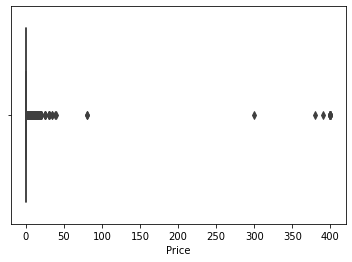

In [31]:
sns.boxplot(gps['Price'])

In [32]:
gps.loc[gps['Price']>250,:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,1,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,1,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,1,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,1,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,1,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,1,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,1,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,1,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,1,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,1,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


##### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [33]:
print('Yes , we can expect the apps on the play store to cost more than $200')
gps.loc[gps['Price']>200,:]

Yes , we can expect the apps on the play store to cost more than $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,1,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,1,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,1,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,1,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,1,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,1,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,1,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,1,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,1,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,1,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


##### iv. Limit data to records with price < $30

In [34]:
gps.drop(gps[(gps['Price']>30)].index,axis=0,inplace=True)

##### iii. After dropping the useless records, make the suitable plot again to identify outliers

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

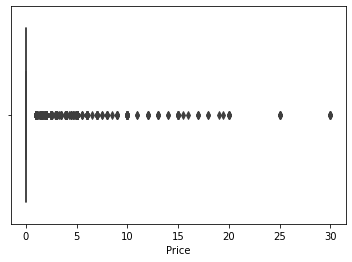

In [35]:
sns.boxplot(gps['Price'])

### b. Reviews column

##### i. Make suitable plot

<AxesSubplot:ylabel='Reviews'>

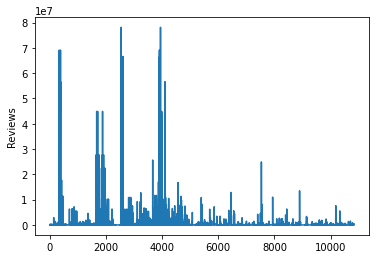

In [36]:
sns.lineplot(x=gps.index,y=gps['Reviews'])

##### ii. Limit data to apps with < 1 Million reviews

In [37]:
gps.drop(gps[(gps['Reviews']>1000000)].index,axis=0,inplace=True)
gps['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

### c. Installs

##### i. What is the 95th percentile of the installs?

In [38]:
x=np.percentile(gps['Installs'],95)
x

10000000.0

##### ii. Drop records having a value more than the 95th percentile

In [39]:
y=gps[gps['Installs']>x].index
gps.drop(labels=y,inplace=True)
print(y.value_counts().sum())

199


# Data analysis to answer business questions


## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

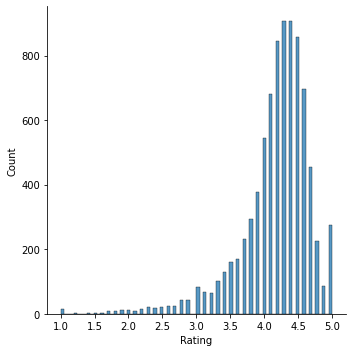

In [40]:
sns.displot(gps['Rating'])

### a. How do you explain this?

In [41]:
print("The skewness of above distribution is ",gps['Rating'].skew())

The skewness of above distribution is  -1.7401206087942478


In [42]:
if gps['Rating'].median()>gps['Rating'].mean():
    print('It is skewed towards Lower values')
else:
    print('It is skewed towards Higher values')

It is skewed towards Lower values


### b. What is the implication of this on your analysis?

In [43]:
print('Mode',gps['Rating'].mode())
print('Median',gps['Rating'].median())
print('Mean',gps['Rating'].mean())

Mode 0    4.3
Name: Rating, dtype: float64
Median 4.3
Mean 4.171464108031271


As mode=median>mean , It is negatively skewed i.e. skewed towards Lower values.

## 6. What are the top Content Rating values?

In [44]:
gps['Content Rating'].value_counts()

Everyone           6788
Teen                901
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

The TOP Content Rating is Everyone.

### a. Are there any values with very few records?


In [45]:
gps['Content Rating'].value_counts()

Everyone           6788
Teen                901
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Yes , 'Adults only 18+' and 'Unrated' are having fewer records

### b. If yes, drop those as they won’t help in the analysis

In [46]:
gps.drop(gps[gps['Content Rating']=='Adults only 18+'].index,axis=0,inplace=True)
gps.drop(gps[gps['Content Rating']=='Unrated'].index,axis=0,inplace=True)

In [47]:
gps.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788,6788
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,901,901,901,901,901,901,901,901,901,901,901,901


## 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating

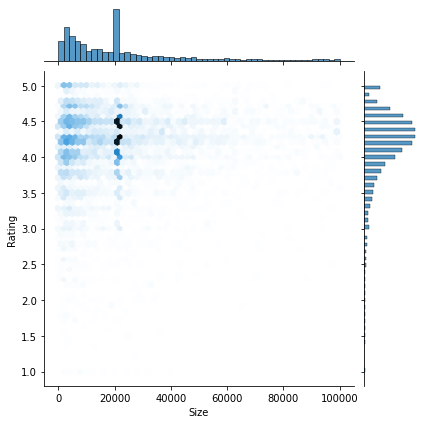

In [48]:
sns.jointplot(x='Size',y='Rating',data=gps,kind='hex')

### b. Do you see any patterns?

Yes, there is a relationship between size and rating.
There exist a corelation among them.

### c. How do you explain the pattern?

On increasing the rating, the size of app also increases ,but not for all values .
Therefore we can conclude that there is positive corelation between size and rating

## 8. Effect of price on rating


### a. Make a jointplot (with regression line)

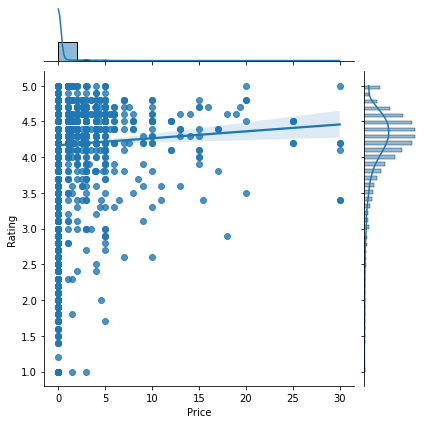

In [49]:
sns.jointplot(x='Price',y='Rating',data=gps, kind='reg')

### b. What pattern do you see?


On increasing the price the Rating almost remains same ,somewhat betwwn 4 and 4.5

### c. How do you explain the pattern?


In [50]:
gps.corr()

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.157862,0.057671,0.117542,0.056062,0.031668
Reviews,0.157862,1.000000,0.204732,0.736083,-0.106039,-0.073497
Size,0.057671,0.204732,1.000000,0.190831,-0.009312,-0.001037
Installs,0.117542,0.736083,0.190831,1.000000,-0.162083,-0.110582
Type,0.056062,-0.106039,-0.009312,-0.162083,1.000000,0.673179
Price,0.031668,-0.073497,-0.001037,-0.110582,0.673179,1.000000


As on increasing the price the rating remains almost same , this resembles in very weak positive correlation.

### d. Replot the data, this time with only records with price > 0 


In [51]:
gps1=gps.loc[gps['Price']>0]

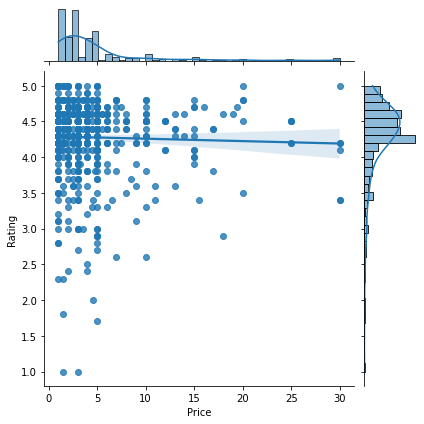

In [52]:
sns.jointplot(x='Price',y='Rating',data=gps1, kind='reg')

### e. Does the pattern change?

In [53]:
gps1.corr()

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.094691,0.117000,0.062666,NaN,-0.029418
Reviews,0.094691,1.000000,0.164049,0.787603,NaN,-0.049210
Size,0.117000,0.164049,1.000000,0.119314,NaN,0.025179
Installs,0.062666,0.787603,0.119314,1.000000,NaN,-0.057119
Type,NaN,NaN,NaN,NaN,NaN,NaN
Price,-0.029418,-0.049210,0.025179,-0.057119,NaN,1.000000


Yes, on the limiting the data with price>0 , slight negative correlation is observed

### f. What is your overall inference on the effect of price on the rating

On increasing the price the Rating almost remains same ,somewhat between 4 and 4.5
For higher price the rating remains remains constant

## 9. Look at all the numeric interactions together – 

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

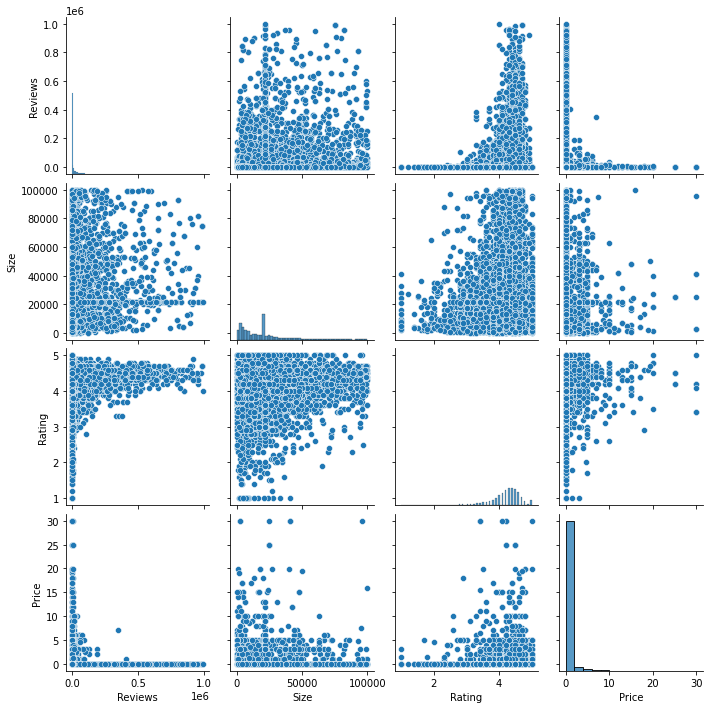

In [54]:
sns.pairplot(gps,vars=['Reviews', 'Size', 'Rating', 'Price'])

## 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

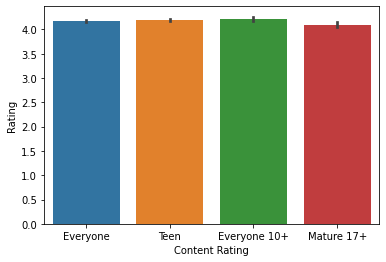

In [55]:
sns.barplot(x='Content Rating',y='Rating',data=gps)

### b. Which metric would you use? Mean? Median? Some other quantile?

C:\Users\91905\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

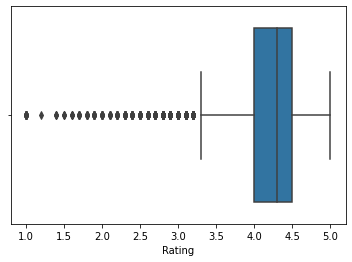

In [56]:
sns.boxplot(gps['Rating'])

We would use median as there are outliers in Rating and mean gets affected by outliers,
on the other hand median is not affected by the Outliers.

### c. Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

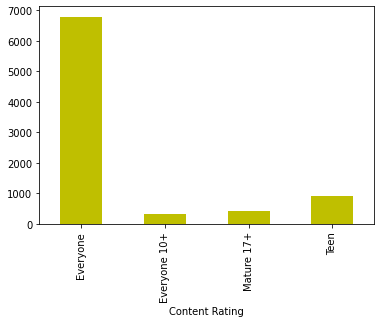

In [57]:
gps.groupby('Content Rating')['Rating'].count().plot.bar(color='y')

## 11. Content rating vs. size vs. rating – 3 variables at a time


### a. Create 5 buckets (20% records in each) based on Size

In [58]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
gps['Size_Buckets'] = pd.cut(gps['Size'], bins, labels=['VERY LOW (0k - 20k)','LOW (20k - 40k)','MED (40k - 60k)','HIGH (60k - 80k)','VERY HIGH (80k - 100k)'])
pd.pivot_table(gps, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW (0k - 20k),4.146605,4.247561,4.010582,4.184469
LOW (20k - 40k),4.200878,4.169811,4.156291,4.170432
MED (40k - 60k),4.167083,4.263636,4.190476,4.237383
HIGH (60k - 80k),4.245408,4.280769,4.200000,4.274194
VERY HIGH (80k - 100k),4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [59]:
Size_Buckets =pd.pivot_table(gps, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW (0k - 20k),3.80,4.02,3.5,3.9
LOW (20k - 40k),4.00,4.00,4.0,3.9
MED (40k - 60k),3.90,4.06,4.1,4.0
HIGH (60k - 80k),4.00,4.00,4.0,4.0
VERY HIGH (80k - 100k),4.04,4.10,4.0,4.0


## c. Make a heatmap of this

### i. Annotated

<AxesSubplot:xlabel='Content Rating', ylabel='Size_Buckets'>

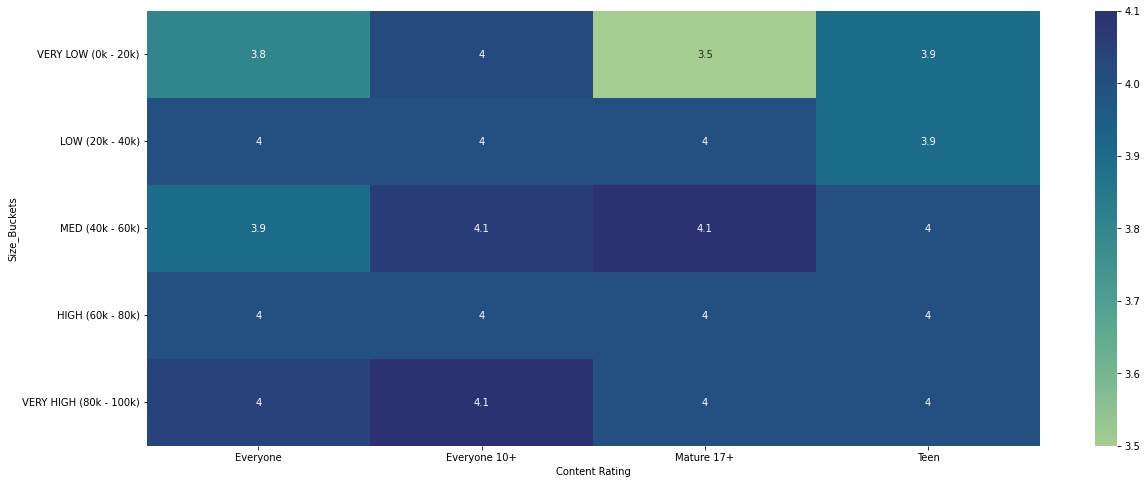

In [60]:
fig=plt.figure(figsize=(20,8))

sns.heatmap(Size_Buckets,cmap='crest',annot = True)



### ii. Greens color map

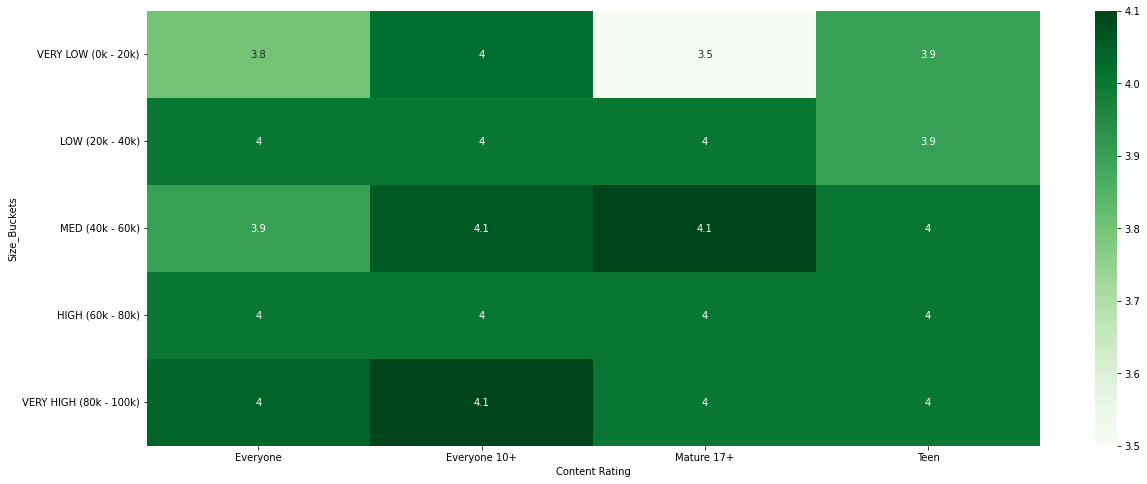

In [61]:
fig=plt.figure(figsize=(20,8))

sns.heatmap(Size_Buckets,cmap='Greens',annot = True)
plt.show()


### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

No, lighter apps are not preferred in all categories.
Because Apps with sizes of 40k-60k & 80k-100k have the highest preference.
Therefore, Heavier apps are preferred in all categories.